
Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[323, 151, 355, 171]]
Labels: ['pothole']


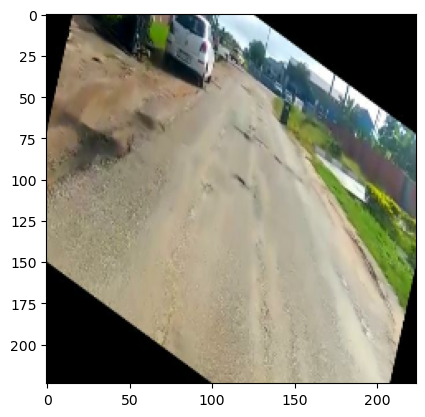

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: []
Labels: []


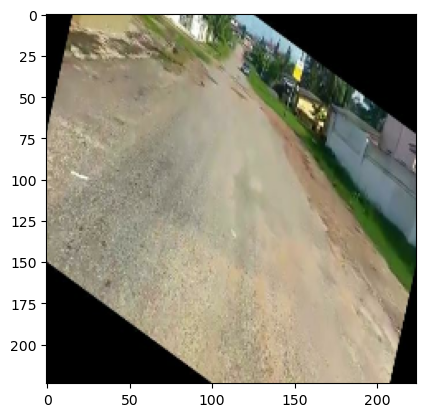

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[64, 33, 126, 71], [112, 123, 305, 300], [260, 168, 341, 250], [280, 108, 306, 129], [262, 1, 325, 69], [19, 133, 77, 176], [100, 14, 123, 32]]
Labels: ['pothole', 'pothole', 'pothole', 'pothole', 'pothole', 'pothole', 'pothole']


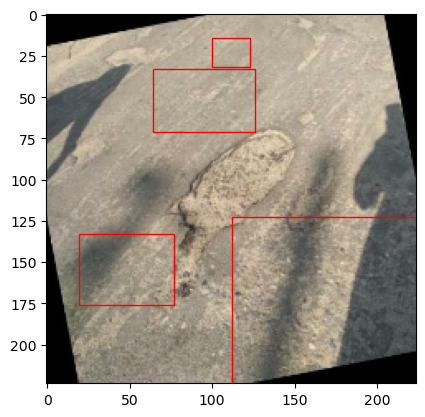

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[282, 118, 351, 167], [304, 173, 362, 217], [374, 192, 446, 249], [158, 296, 336, 353], [295, 19, 338, 43], [241, 43, 315, 78], [132, 116, 181, 147], [259, 77, 317, 107], [275, 89, 329, 118]]
Labels: ['pothole', 'pothole', 'pothole', 'pothole', 'pothole', 'pothole', 'pothole', 'pothole', 'pothole']


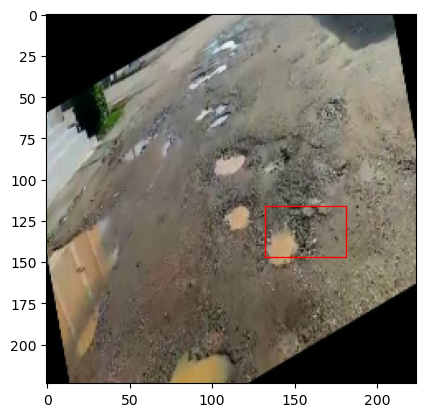

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[147, 144, 295, 276]]
Labels: ['pothole']


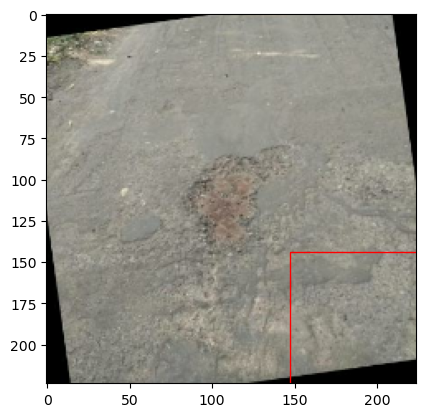

In [1]:
import tensorflow as tf
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random

# Define the function to parse XML annotations
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    boxes = []
    labels = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)

    return boxes, labels

def load_dataset(image_dir, annotation_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    annotation_paths = [os.path.join(annotation_dir, filename) for filename in os.listdir(annotation_dir) if filename.endswith('.xml')]

    dataset = []

    for annotation_path in annotation_paths:
        image_filename = os.path.basename(annotation_path).replace('.xml', '.jpg')
        image_path = os.path.join(image_dir, image_filename)

        if image_path in image_paths:
            boxes, labels = parse_annotation(annotation_path)
            image = tf.io.read_file(image_path)
            image = tf.image.decode_image(image, channels=3)
            image = tf.image.resize(image, (224, 224))  # Adjust size as needed

            dataset.append((image, (boxes, labels)))

    return dataset

# Define the function to load and preprocess the dataset
def load_and_preprocess_dataset(base_dir, class_name):
    image_dir = os.path.join(base_dir, class_name)
    train_dir = os.path.join(image_dir, "train")
    test_dir = os.path.join(image_dir, "test")

    # Define a function for image and label preprocessing
    def preprocess_image(image, size=(224, 224)):
        # Resize the image to the specified size
        image = tf.image.resize(image, size)
        # Normalize pixel values to be in the range [0, 1]
        image = image / 255.0
        return image

    def preprocess_labels(labels):
        # Convert labels to numerical format if needed
        # For binary classification (fire or no fire), you may not need this step
        return labels
    
    # Load the training dataset
    train_dataset = load_dataset(train_dir, train_dir)

    # Preprocess the training dataset
    train_dataset = [(preprocess_image(image), {"boxes": boxes, "labels": preprocess_labels(labels)}) for image, (boxes, labels) in train_dataset]

    # Load the test dataset
    test_dataset = load_dataset(test_dir, test_dir)

    # Preprocess the test dataset
    test_dataset = [(preprocess_image(image), {"boxes": boxes, "labels": preprocess_labels(labels)}) for image, (boxes, labels) in test_dataset]

    return train_dataset, test_dataset

# Replace this path with the actual path to your labeled dataset
base_dataset_dir = r'C:\Users\Bhargav\Documents\Pothole Detection'

# Load and preprocess the "fire" class dataset
pothole_train_dataset, pothole_test_dataset = load_and_preprocess_dataset(base_dataset_dir, "pothole")

# Load and preprocess the "no_fire" class dataset
#no_fire_train_dataset, no_fire_test_dataset = load_and_preprocess_dataset(base_dataset_dir, "no fire")

num_samples_to_visualize = 5

# Get a list of unique random indices
unique_random_indices = random.sample(range(len(pothole_train_dataset)), num_samples_to_visualize)

for random_index in unique_random_indices:
    print("Number of samples in the fire training dataset:", len(pothole_train_dataset))
    print("Example information:")
    print("Image shape:", pothole_train_dataset[random_index][0].shape)
    print("Bounding boxes:", pothole_train_dataset[random_index][1]["boxes"])
    print("Labels:", pothole_train_dataset[random_index][1]["labels"])

    # Visualize a sample image
    sample_image = pothole_train_dataset[random_index][0].numpy()
    sample_boxes = pothole_train_dataset[random_index][1]["boxes"]

    plt.imshow(sample_image)

    for box in sample_boxes:
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

    plt.show()
    
    import time
    time.sleep(1)

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[113, 125, 304, 232]]
Labels: ['pothole']


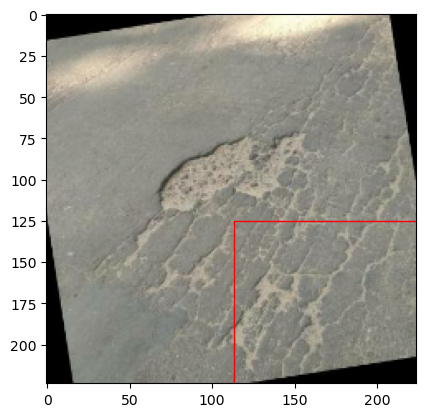

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[108, 102, 249, 230], [38, 312, 144, 403]]
Labels: ['pothole', 'pothole']


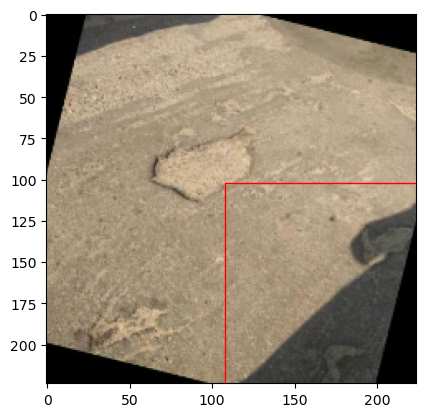

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[183, 179, 257, 255]]
Labels: ['pothole']


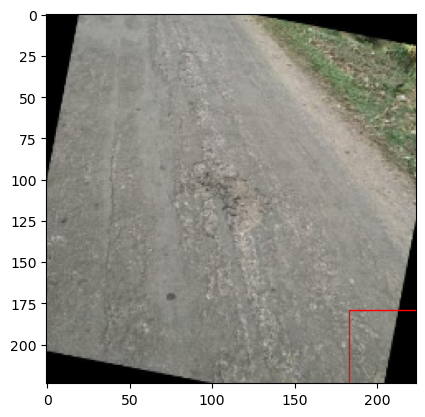

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[71, 247, 334, 417]]
Labels: ['pothole']


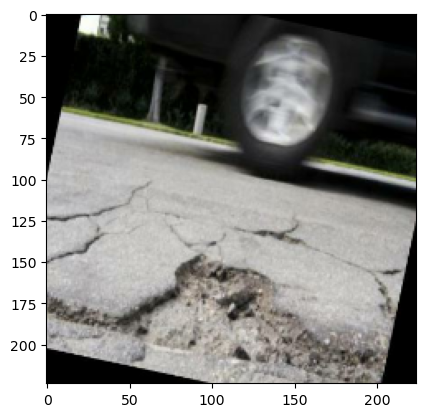

Number of samples in the fire training dataset: 3043
Example information:
Image shape: (224, 224, 3)
Bounding boxes: [[243, 155, 440, 275]]
Labels: ['pothole']


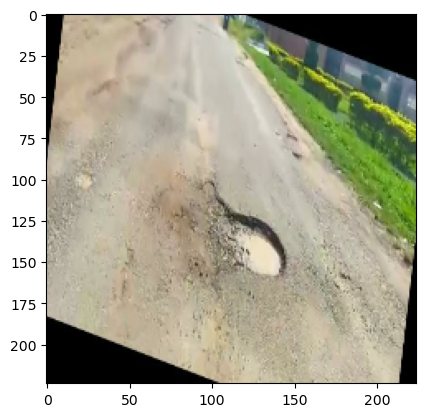




Epoch 1/10


96/96 [==============================] - 1561s 13s/step - loss: 0.0178 - accuracy: 0.9908 - val_loss: 2.9511 - val_accuracy: 0.0000e+00
Epoch 2/10
96/96 [==============================] - 477s 5s/step - loss: 7.2780e-06 - accuracy: 1.0000 - val_loss: 2.0283 - val_accuracy: 0.0000e+00
Epoch 3/10
96/96 [==============================] - 314s 3s/step - loss: 3.7216e-06 - accuracy: 1.0000 - val_loss: 1.2575 - val_accuracy: 0.0690
Epoch 4/10
96/96 [==============================] - 298s 3s/step - loss: 2.7458e-06 - accuracy: 1.0000 - val_loss: 0.3383 - val_accuracy: 0.8218
Epoch 5/10
96/96 [==============================] - 293s 3s/step - loss: 1.9809e-06 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/10
96/96 [==============================] - 341s 4s/step - loss: 2.0884e-06 - accuracy: 1.0000 - val_loss: 2.2323e-04 - val_accuracy: 1.0000
Epoch 7/10
96/96 [==============================] - 326s 3s/step - loss: 1.3753e-06 - accuracy: 1.0000 - val_loss: 

C:\Users\Bhargav\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Instructions for updating:
Use `tf.data.Dataset.save(...)` instead.


In [2]:
import tensorflow as tf
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers

# Define the function to parse XML annotations
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    boxes = []
    labels = []

    for obj in root.findall('object'):
        label = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)

        boxes.append([xmin, ymin, xmax, ymax])
        labels.append(label)

    return boxes, labels

def load_dataset(image_dir, annotation_dir):
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.jpeg', '.png'))]
    annotation_paths = [os.path.join(annotation_dir, filename) for filename in os.listdir(annotation_dir) if filename.endswith('.xml')]

    dataset = []

    for annotation_path in annotation_paths:
        image_filename = os.path.basename(annotation_path).replace('.xml', '.jpg')
        image_path = os.path.join(image_dir, image_filename)

        if image_path in image_paths:
            boxes, labels = parse_annotation(annotation_path)
            image = tf.io.read_file(image_path)
            image = tf.image.decode_image(image, channels=3)
            image = tf.image.resize(image, (224, 224))  # Adjust size as needed

            dataset.append((image, (boxes, labels)))

    return dataset

# Define the function to load and preprocess the dataset
def load_and_preprocess_dataset(base_dir, class_name):
    image_dir = os.path.join(base_dir, class_name)
    train_dir = os.path.join(image_dir, "train")
    test_dir = os.path.join(image_dir, "test")

    # Define a function for image and label preprocessing
    def preprocess_image(image, size=(224, 224)):
        # Resize the image to the specified size
        image = tf.image.resize(image, size)
        # Normalize pixel values to be in the range [0, 1]
        image = image / 255.0
        return image

    def preprocess_labels(labels):
        # Convert labels to numerical format if needed
        # For binary classification (fire or no fire), you may not need this step
        return labels
    
    # Load the training dataset
    train_dataset = load_dataset(train_dir, train_dir)

    # Preprocess the training dataset
    train_dataset = [(preprocess_image(image), {"boxes": boxes, "labels": preprocess_labels(labels)}) for image, (boxes, labels) in train_dataset]

    # Load the test dataset
    test_dataset = load_dataset(test_dir, test_dir)

    # Preprocess the test dataset
    test_dataset = [(preprocess_image(image), {"boxes": boxes, "labels": preprocess_labels(labels)}) for image, (boxes, labels) in test_dataset]

    return train_dataset, test_dataset

# Replace this path with the actual path to your labeled dataset
base_dataset_dir = r'C:\Users\Bhargav\Documents\Pothole Detection'

# Load and preprocess the "fire" class dataset
pothole_train_dataset, pothole_test_dataset = load_and_preprocess_dataset(base_dataset_dir, "pothole")

# Load and preprocess the "no_fire" class dataset
#no_fire_train_dataset, no_fire_test_dataset = load_and_preprocess_dataset(base_dataset_dir, "no fire")

num_samples_to_visualize = 5

# Get a list of unique random indices
unique_random_indices = random.sample(range(len(pothole_train_dataset)), num_samples_to_visualize)

for random_index in unique_random_indices:
    print("Number of samples in the fire training dataset:", len(pothole_train_dataset))
    print("Example information:")
    print("Image shape:", pothole_train_dataset[random_index][0].shape)
    print("Bounding boxes:", pothole_train_dataset[random_index][1]["boxes"])
    print("Labels:", pothole_train_dataset[random_index][1]["labels"])

    # Visualize a sample image
    sample_image = pothole_train_dataset[random_index][0].numpy()
    sample_boxes = pothole_train_dataset[random_index][1]["boxes"]

    plt.imshow(sample_image)

    for box in sample_boxes:
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

    plt.show()
    
    import time
    time.sleep(1)

# EfficientDet Backbone
eff_backbone = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Custom Head
model_head = tf.keras.Sequential([
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Combine the EfficientDet backbone with the custom head
full_model = tf.keras.Sequential([
    eff_backbone,
    model_head
])

# Compile the model
full_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train_dataset = tf.data.Dataset.from_tensor_slices(
    ([image for image, _ in pothole_train_dataset], [1] * len(pothole_train_dataset))
)
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices(
    ([image for image, _ in pothole_test_dataset], [1] * len(pothole_test_dataset))
)
test_dataset = test_dataset.batch(batch_size=32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Train the model
full_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Print test accuracy
test_loss, test_accuracy = full_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy}")

# Save the trained model
full_model.save(r"C:\Users\Bhargav\Documents\Pothole_Detection_Model\pothole_detection_model.h5")

# Save the datasets
tf.data.experimental.save(train_dataset, r"C:\Users\Bhargav\Documents\Pothole_Detection_Model\train_dataset")
tf.data.experimental.save(test_dataset, r"C:\Users\Bhargav\Documents\Pothole_Detection_Model\test_dataset")